In [276]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

### Preprocessing/Analysis (28 pts)

In [277]:
df = pd.read_csv('EuCitiesTemperatures.csv')
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


[9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.


In [278]:
mean_latitudes = df.groupby('country')['latitude'].transform('mean').round(2)
mean_longitudes = df.groupby('country')['longitude'].transform('mean').round(2)

df['latitude'].fillna(mean_latitudes, inplace=True)
df['longitude'].fillna(mean_longitudes, inplace=True)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


[9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [279]:
subset_df = df[(df['latitude'].between(40, 60, inclusive='both')) &
               (df['longitude'].between(15, 30, inclusive='both'))]

max_count = subset_df['country'].value_counts().max()

max_countries = subset_df['country'].value_counts()[subset_df['country'].value_counts() == max_count].index.tolist()
print(max_countries)

['Romania', 'Poland']


[10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).

In [280]:
# Group by EU and coastline to identify unique region types
region_types = df.groupby(['EU', 'coastline'])

# Calculate the average temperature for each region type
avg_temp_by_region = region_types['temperature'].mean().round(2)

# Fill missing temperature values with the average temperature of the corresponding region type
for idx, row in df.iterrows():
    if pd.isnull(row['temperature']):
        region_type = (row['EU'], row['coastline'])
        avg_temp = avg_temp_by_region.get(region_type)
        df.at[idx, 'temperature'] = avg_temp

# Display the updated DataFrame
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


### Visualization (27 pts)

[6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.


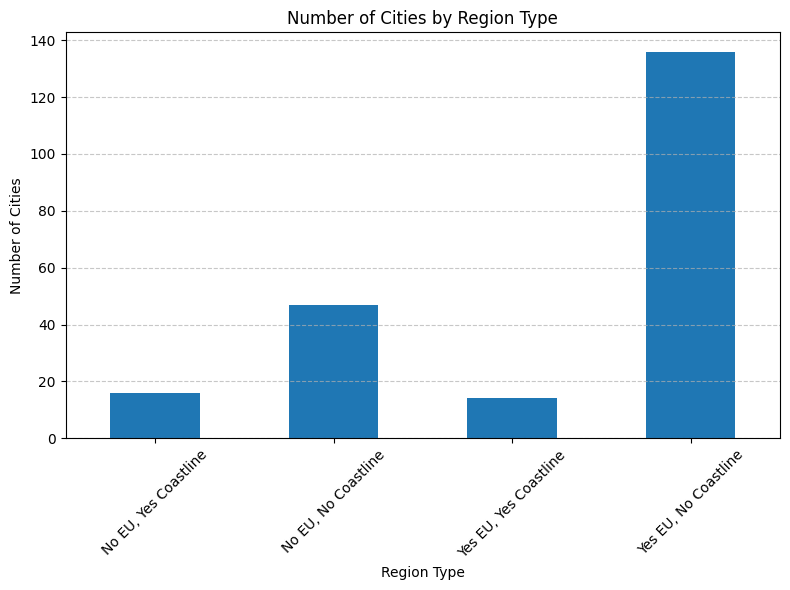

In [281]:
region_counts = df.groupby(['EU', 'coastline']).size()

custom_labels = ['No EU, Yes Coastline', 'No EU, No Coastline', 'Yes EU, Yes Coastline', 'Yes EU, No Coastline']

# Plot a bar chart
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar')
plt.title('Number of Cities by Region Type')
plt.xlabel('Region Type')
plt.ylabel('Number of Cities')
plt.xticks(range(len(custom_labels)), custom_labels, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


[7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.


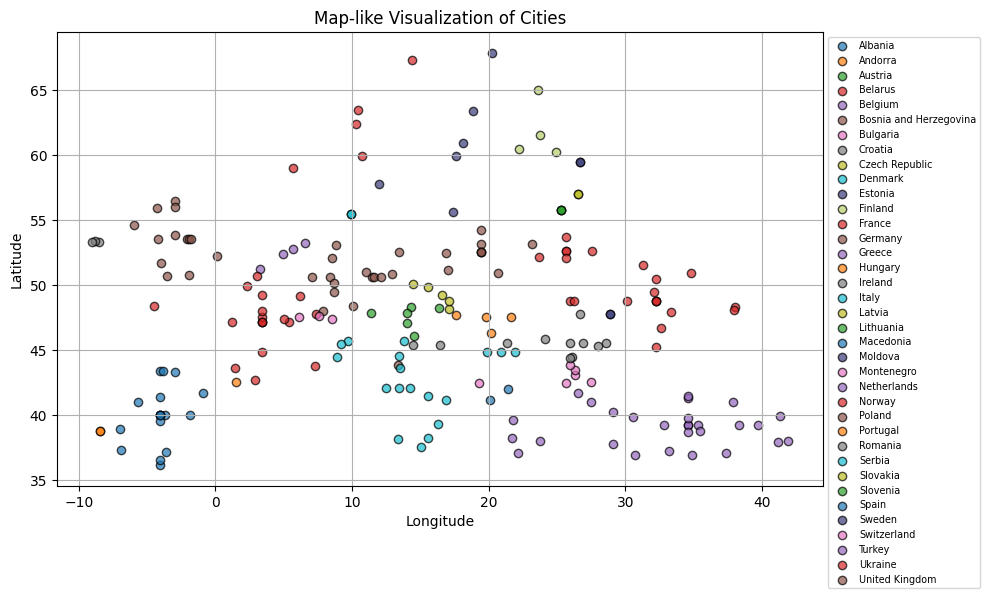

In [282]:
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
                  '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#393b79', '#b5cf6b',
                  '#d62728', '#8c564b', '#9467bd', '#ff7f0e', '#7f7f7f', '#17becf',
                  '#bcbd22', '#2ca02c', '#1f77b4', '#393b79', '#e377c2', '#9467bd',
                  '#d62728', '#8c564b', '#ff7f0e', '#7f7f7f', '#17becf', '#bcbd22',
                  '#2ca02c', '#1f77b4', '#393b79', '#e377c2', '#9467bd', '#d62728',
                  '#8c564b', '#ff7f0e', '#7f7f7f', '#17becf', '#bcbd22', '#2ca02c',
                  '#1f77b4', '#393b79', '#e377c2']

country_color_map = {country: custom_palette[i % len(custom_palette)] for i, country in enumerate(df['country'].unique())}

colors = df['country'].map(country_color_map)

plt.figure(figsize=(10, 6))
for country, color in country_color_map.items():
    country_df = df[df['country'] == country]
    plt.scatter(country_df['longitude'], country_df['latitude'], c=color, edgecolors='k', alpha=0.7, label=country)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map-like Visualization of Cities')

legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='x-small')
frame = legend.get_frame()
frame.set_facecolor('white')

plt.grid(True)
plt.tight_layout()
plt.show()


[6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

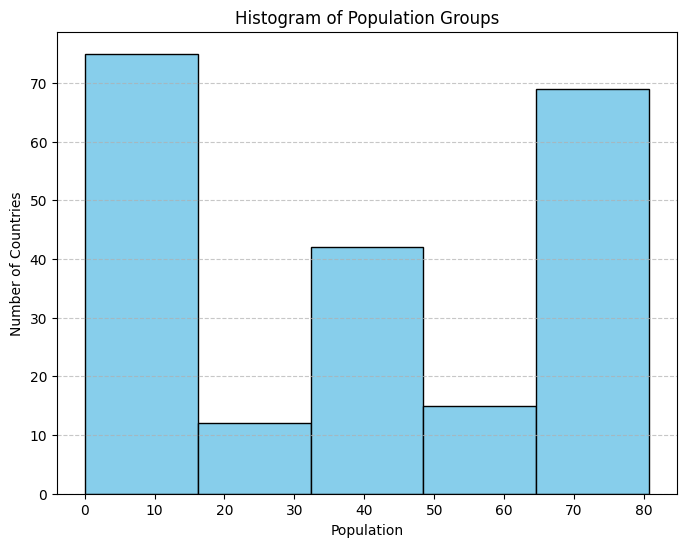

In [283]:
plt.figure(figsize=(8, 6))
plt.hist(df['population'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Population Groups')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

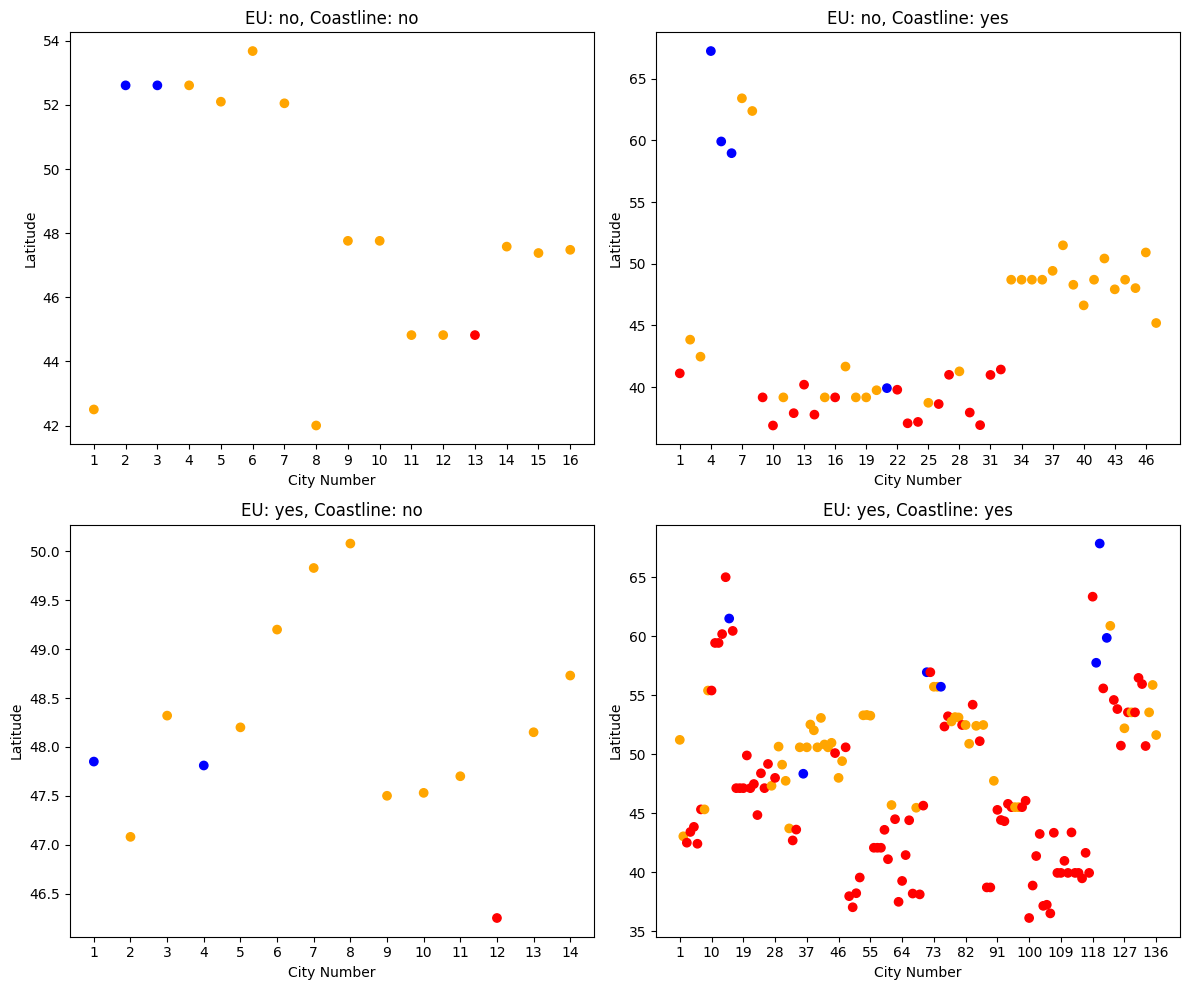

In [284]:
region_types = df.groupby(['EU', 'coastline'])

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for (eu, coastline), ax in zip(region_types.groups.keys(), axs.flat):
    group_df = region_types.get_group((eu, coastline))
    n = len(group_df)

    step = max(1, n // 15)

    colors = []
    for temp in group_df['temperature']:
        if temp is None:
            colors.append('gray')
        elif temp > 10:
            colors.append('red')
        elif temp < 6:
            colors.append('blue')
        else:
            colors.append('orange')

    ax.scatter(range(n), group_df['latitude'], color=colors, label=f'EU: {eu}, Coastline: {coastline}')
    ax.set_xlabel('City Number')
    ax.set_ylabel('Latitude')
    ax.set_title(f'EU: {eu}, Coastline: {coastline}')
    ax.set_xticks(range(0, n, step))
    ax.set_xticklabels(range(1, n + 1, step))  # Numbering from 1 to n with step size

plt.tight_layout()
plt.show()